In [2]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_md")  # or en_core_web_sm if you don’t need word embeddings

def preprocess_text(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        # Remove stopwords, punctuation, and non-alphabetic tokens
        if not token.is_stop and not token.is_punct and token.is_alpha:
            tokens.append(token.lemma_.lower())  # Append lemmatized form and lowercase
    return tokens

# Generate news headlines with some words occurring twice in the same headline
headlines = [
    "Apple launches new iPhone iPhone in September",
    "Google announces AI advancements with AI in health sector",
    "Tesla's electric cars revolutionize the electric car industry",
    "Amazon announces new grocery delivery for grocery stores",
    "Netflix announces new series based on new AI-based technology",
    "Microsoft launches cloud services and cloud infrastructure",
    "Facebook unveils privacy controls with enhanced privacy features",
    "Pfizer launches vaccine trials for new vaccine prevention",
    "Nike launches new eco-friendly shoe and shoe design",
    "BMW announces electric car breakthrough in the electric vehicle market"
]

# Preprocess the list of headlines
preprocessed_headlines = [" ".join(preprocess_text(headline)) for headline in headlines]
print(preprocessed_headlines)  # Output preprocessed headlines


['apple launch new iphone iphone september', 'google announce ai advancement ai health sector', 'tesla electric car revolutionize electric car industry', 'amazon announce new grocery delivery grocery store', 'netflix announce new series base new ai base technology', 'microsoft launch cloud service cloud infrastructure', 'facebook unveil privacy control enhance privacy feature', 'pfizer launch vaccine trial new vaccine prevention', 'nike launch new eco friendly shoe shoe design', 'bmw announce electric car breakthrough electric vehicle market']


In [18]:
from gensim import corpora
from gensim.models import TfidfModel

# Tokenize preprocessed headlines
tokenized_headlines = [headline.split() for headline in preprocessed_headlines]

# Create a dictionary of words
dictionary = corpora.Dictionary(tokenized_headlines)

# Create a Bag of Words corpus
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_headlines]

# Or, alternatively, create a TF-IDF corpus
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]


In [19]:
import pandas as pd
from gensim import corpora
from gensim.models import TfidfModel

# Assuming bow_corpus is already defined and dictionary is available
# dictionary = corpora.Dictionary(tokenized_headlines)

# Create a list of terms (vocabulary) from the dictionary
terms = [dictionary[i] for i in range(len(dictionary))]

# Create a document-term matrix for the Bag of Words (BoW) corpus
bow_doc_term_matrix = pd.DataFrame([[dict(doc).get(i, 0) for doc in bow_corpus] for i in range(len(dictionary))],
                                   index=terms)

# Display the BoW document-term matrix
#tools.display_dataframe_to_user(name="BoW Document-Term Matrix", dataframe=bow_doc_term_matrix)
print(bow_doc_term_matrix)

                0  1  2  3  4  5  6  7  8  9
apple           1  0  0  0  0  0  0  0  0  0
iphone          2  0  0  0  0  0  0  0  0  0
launch          1  0  0  0  0  1  0  1  1  0
new             1  0  0  1  2  0  0  1  1  0
september       1  0  0  0  0  0  0  0  0  0
advancement     0  1  0  0  0  0  0  0  0  0
ai              0  2  0  0  1  0  0  0  0  0
announce        0  1  0  1  1  0  0  0  0  1
google          0  1  0  0  0  0  0  0  0  0
health          0  1  0  0  0  0  0  0  0  0
sector          0  1  0  0  0  0  0  0  0  0
car             0  0  2  0  0  0  0  0  0  1
electric        0  0  2  0  0  0  0  0  0  2
industry        0  0  1  0  0  0  0  0  0  0
revolutionize   0  0  1  0  0  0  0  0  0  0
tesla           0  0  1  0  0  0  0  0  0  0
amazon          0  0  0  1  0  0  0  0  0  0
delivery        0  0  0  1  0  0  0  0  0  0
grocery         0  0  0  2  0  0  0  0  0  0
store           0  0  0  1  0  0  0  0  0  0
base            0  0  0  0  2  0  0  0  0  0
netflix   

In [20]:
import pandas as pd
from gensim import corpora
from gensim.models import TfidfModel

# Sample tokenized headlines
#tokenized_headlines = [
#    ['apple', 'launches', 'new', 'iphone'],
#    ['google', 'announces', 'ai', 'advancements'],
#    ['tesla', 'electric', 'cars', 'revolutionize', 'auto', 'industry']
#]

# Create a dictionary of words
dictionary = corpora.Dictionary(tokenized_headlines)

# Create a Bag of Words corpus
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_headlines]

# Create a TF-IDF model and transform the BoW corpus into a TF-IDF corpus
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# Get the terms and documents (features and data)
terms = [dictionary[i] for i in range(len(dictionary))]
tfidf_doc_term_matrix = pd.DataFrame([[dict(doc).get(i, 0) for doc in tfidf_corpus] for i in range(len(dictionary))],
                               index=terms)

# Display the document-term matrix with TF-IDF values
#import ace_tools as tools; tools.display_dataframe_to_user(name="TF-IDF Document-Term Matrix", dataframe=doc_term_matrix)
print(tfidf_doc_term_matrix)

                       0         1        2         3         4         5  \
apple           0.400033  0.000000  0.00000  0.000000  0.000000  0.000000   
iphone          0.800066  0.000000  0.00000  0.000000  0.000000  0.000000   
launch          0.159189  0.000000  0.00000  0.000000  0.000000  0.148734   
new             0.120422  0.000000  0.00000  0.111808  0.212736  0.000000   
september       0.400033  0.000000  0.00000  0.000000  0.000000  0.000000   
advancement     0.000000  0.404471  0.00000  0.000000  0.000000  0.000000   
ai              0.000000  0.565426  0.00000  0.000000  0.246978  0.000000   
announce        0.000000  0.160955  0.00000  0.147802  0.140611  0.000000   
google          0.000000  0.404471  0.00000  0.000000  0.000000  0.000000   
health          0.000000  0.404471  0.00000  0.000000  0.000000  0.000000   
sector          0.000000  0.404471  0.00000  0.000000  0.000000  0.000000   
car             0.000000  0.000000  0.53186  0.000000  0.000000  0.000000   

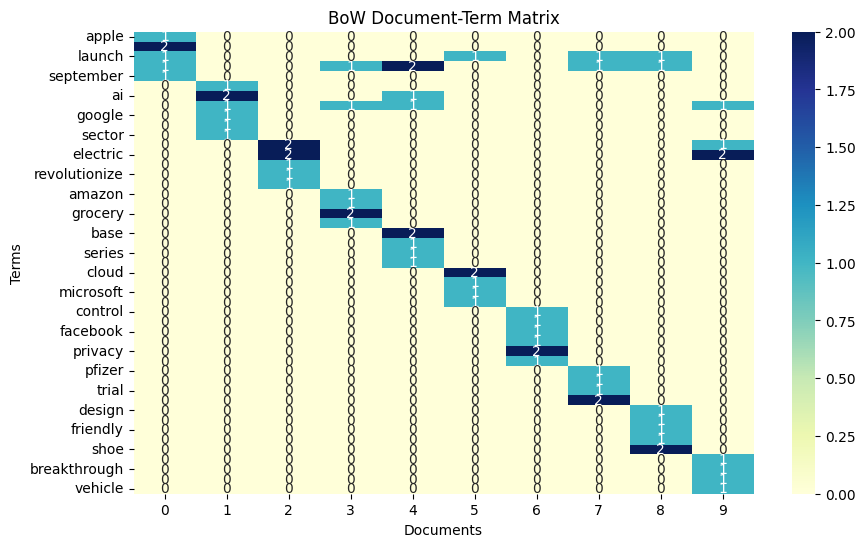

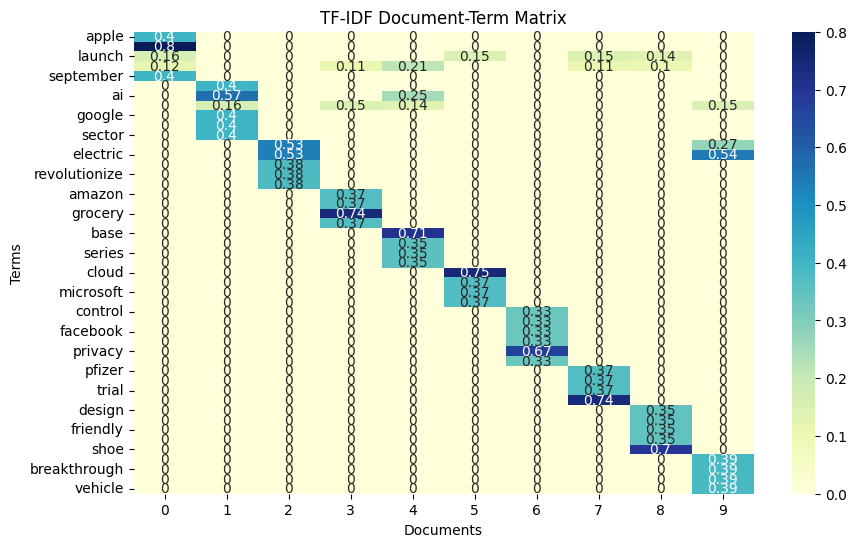

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing BoW Document-Term Matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bow_doc_term_matrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title("BoW Document-Term Matrix")
plt.xlabel("Documents")
plt.ylabel("Terms")
plt.show()

# Visualizing TF-IDF Document-Term Matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tfidf_doc_term_matrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title("TF-IDF Document-Term Matrix")
plt.xlabel("Documents")
plt.ylabel("Terms")
plt.show()


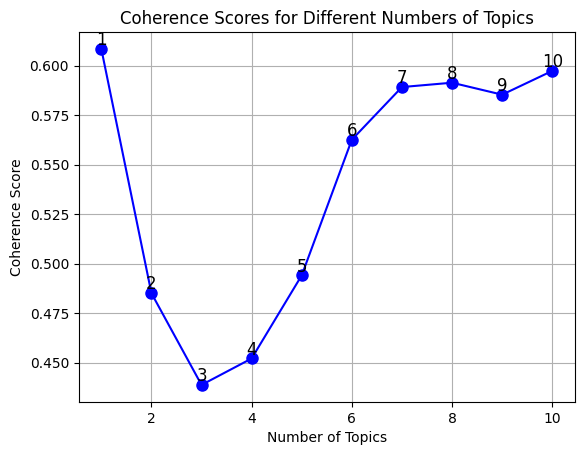

Num Topics = 1, Coherence Score = 0.6084017316425948
Num Topics = 2, Coherence Score = 0.4850999281173676
Num Topics = 3, Coherence Score = 0.43880622661195395
Num Topics = 4, Coherence Score = 0.45214690980136707
Num Topics = 5, Coherence Score = 0.49411225272931
Num Topics = 6, Coherence Score = 0.5625746456413455
Num Topics = 7, Coherence Score = 0.5891516394541094
Num Topics = 8, Coherence Score = 0.5913467933307868
Num Topics = 9, Coherence Score = 0.5853071016026867
Num Topics = 10, Coherence Score = 0.5973051017290663


In [24]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

# Assuming the 'tokenized_headlines' list from the previous code is available
# Tokenized headlines should already be preprocessed (lowercased, lemmatized, no stopwords, etc.)

# Create dictionary and corpus
dictionary = Dictionary(tokenized_headlines)
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_headlines]

# Function to compute coherence scores for different numbers of topics
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Compute coherence scores for 1-10 topics
start, limit, step = 1, 11, 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=tokenized_headlines, start=start, limit=limit, step=step)

# Visualize coherence scores
#x = range(start, limit, step)
#plt.plot(x, coherence_values)
#plt.xlabel("Number of Topics")
#plt.ylabel("Coherence Score")
#plt.title("Coherence Scores for Different Numbers of Topics")
#plt.show()

# Visualize coherence scores with grid lines and point labels
x = range(start, limit, step)
plt.plot(x, coherence_values, marker='o', color='b', linestyle='-', markersize=8)

# Add grid lines
plt.grid(True)

# Add labels to each point
for i, coherence_value in enumerate(coherence_values, start):
    plt.text(i, coherence_value, str(i), fontsize=12, ha='center', va='bottom')

plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.show()


# Print the coherence values for each number of topics
for i, coherence_value in enumerate(coherence_values, start):
    print(f"Num Topics = {i}, Coherence Score = {coherence_value}")


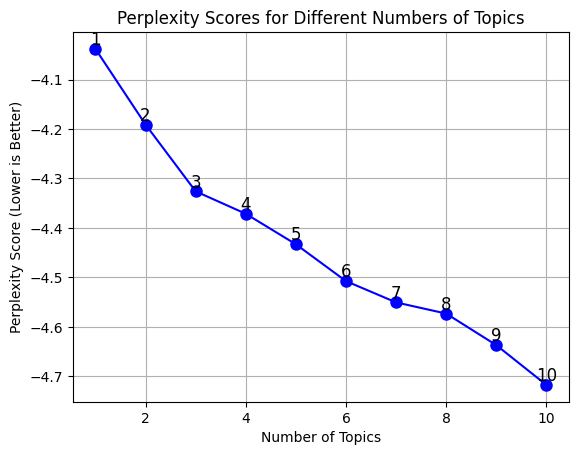

Num Topics = 1, Perplexity Score = -4.038114865620931
Num Topics = 2, Perplexity Score = -4.191057972609997
Num Topics = 3, Perplexity Score = -4.3260950818657875
Num Topics = 4, Perplexity Score = -4.371397508515252
Num Topics = 5, Perplexity Score = -4.433101132512093
Num Topics = 6, Perplexity Score = -4.507561271389325
Num Topics = 7, Perplexity Score = -4.550614183975591
Num Topics = 8, Perplexity Score = -4.5732380714681415
Num Topics = 9, Perplexity Score = -4.636982539461719
Num Topics = 10, Perplexity Score = -4.717503990564081


In [25]:
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

# Assuming 'tokenized_headlines' is already preprocessed (lowercased, lemmatized, no stopwords)
# Example tokenized_headlines:
if False:
    tokenized_headlines = [
        ['apple', 'launch', 'new', 'iphone'],
        ['google', 'announce', 'ai', 'advancement', 'health'],
        ['tesla', 'electric', 'car', 'industry'],
        ['amazon', 'announce', 'grocery', 'delivery'],
        ['netflix', 'announce', 'series', 'technology'],
        ['microsoft', 'launch', 'cloud', 'service', 'infrastructure'],
        ['facebook', 'unveil', 'privacy', 'feature'],
        ['pfizer', 'launch', 'vaccine', 'trial'],
        ['nike', 'launch', 'eco', 'friendly', 'shoe'],
        ['bmw', 'announce', 'electric', 'vehicle', 'market']
    ]

# Create dictionary and corpus
dictionary = Dictionary(tokenized_headlines)
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_headlines]

# Function to compute perplexity for different numbers of topics
def compute_perplexity_values(dictionary, corpus, start, limit, step):
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10)
        model_list.append(model)
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)
    return model_list, perplexity_values

# Compute perplexity scores for 1-10 topics
start, limit, step = 1, 11, 1
model_list, perplexity_values = compute_perplexity_values(dictionary=dictionary, corpus=bow_corpus, start=start, limit=limit, step=step)

# Visualize perplexity scores
x = range(start, limit, step)
plt.plot(x, perplexity_values, marker='o', color='b', linestyle='-', markersize=8)

# Add grid lines
plt.grid(True)

# Add labels to each point
for i, perplexity_value in enumerate(perplexity_values, start):
    plt.text(i, perplexity_value, str(i), fontsize=12, ha='center', va='bottom')

plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score (Lower is Better)")
plt.title("Perplexity Scores for Different Numbers of Topics")
plt.show()

# Print the perplexity values for each number of topics
for i, perplexity_value in enumerate(perplexity_values, start):
    print(f"Num Topics = {i}, Perplexity Score = {perplexity_value}")


In [22]:
from gensim.models import LdaModel

# Set the number of topics you want to extract
NUM_TOPICS = 5

# Train the LDA model on the Bag of Words corpus
lda_model = LdaModel(bow_corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=10)

# Print the topics with their top words
for idx, topic in lda_model.print_topics(num_topics=NUM_TOPICS, num_words=5):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.098*"ai" + 0.098*"iphone" + 0.054*"announce" + 0.054*"health" + 0.054*"advancement"
Topic 1: 0.021*"launch" + 0.021*"new" + 0.021*"announce" + 0.021*"ai" + 0.021*"service"
Topic 2: 0.172*"electric" + 0.131*"car" + 0.049*"revolutionize" + 0.049*"bmw" + 0.049*"vehicle"
Topic 3: 0.083*"new" + 0.057*"announce" + 0.057*"base" + 0.057*"grocery" + 0.057*"privacy"
Topic 4: 0.090*"launch" + 0.090*"new" + 0.090*"shoe" + 0.090*"vaccine" + 0.049*"nike"


In [12]:
from gensim.models import LdaModel

# Set the number of topics you want to extract
NUM_TOPICS = 5

# Train the LDA model on the TF-IDF corpus
lda_model = LdaModel(tfidf_corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=10)

# Print the topics with their top words
for idx, topic in lda_model.print_topics(num_topics=NUM_TOPICS, num_words=5):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.052*"recommendation" + 0.052*"system" + 0.052*"netflix" + 0.052*"base" + 0.041*"ai"
Topic 1: 0.039*"delivery" + 0.039*"expansion" + 0.039*"amazon" + 0.039*"grocery" + 0.036*"service"
Topic 2: 0.043*"flu" + 0.043*"eco" + 0.043*"nike" + 0.043*"prevention" + 0.043*"vaccine"
Topic 3: 0.050*"breakthrough" + 0.050*"bmw" + 0.050*"expo" + 0.050*"tech" + 0.040*"electric"
Topic 4: 0.045*"apple" + 0.045*"september" + 0.045*"iphone" + 0.041*"feature" + 0.041*"safety"


In [13]:
# Preprocess and tokenize a new headline
new_headline = "Tesla unveils new battery technology"
new_tokens = preprocess_text(new_headline)

# Convert the new headline into the BoW format using the same dictionary
new_bow = dictionary.doc2bow(new_tokens)

# Predict topic distribution for the new headline
new_topic_distribution = lda_model.get_document_topics(new_bow)

print(new_topic_distribution)  # Show the topic distribution for the new headline


[(0, 0.050361045), (1, 0.3783328), (2, 0.050611652), (3, 0.05013806), (4, 0.47055644)]


In [14]:
print(new_bow)

[(3, 1), (15, 1), (35, 1)]


In [15]:
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(2, 1), (3, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(3, 1), (7, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(3, 1), (6, 1), (7, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(2, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(3, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1)], [(2, 1), (3, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(2, 1), (3, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(7, 1), (11, 1), (12, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]


In [27]:
print(tokenized_headlines)

[['apple', 'launch', 'new', 'iphone', 'iphone', 'september'], ['google', 'announce', 'ai', 'advancement', 'ai', 'health', 'sector'], ['tesla', 'electric', 'car', 'revolutionize', 'electric', 'car', 'industry'], ['amazon', 'announce', 'new', 'grocery', 'delivery', 'grocery', 'store'], ['netflix', 'announce', 'new', 'series', 'base', 'new', 'ai', 'base', 'technology'], ['microsoft', 'launch', 'cloud', 'service', 'cloud', 'infrastructure'], ['facebook', 'unveil', 'privacy', 'control', 'enhance', 'privacy', 'feature'], ['pfizer', 'launch', 'vaccine', 'trial', 'new', 'vaccine', 'prevention'], ['nike', 'launch', 'new', 'eco', 'friendly', 'shoe', 'shoe', 'design'], ['bmw', 'announce', 'electric', 'car', 'breakthrough', 'electric', 'vehicle', 'market']]


In [26]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00


In [28]:
import pyLDAvis
import pyLDAvis.gensim
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

# Assuming 'tokenized_headlines' is already preprocessed (lowercased, lemmatized, no stopwords)
# Example tokenized_headlines:
if False:
    tokenized_headlines = [
        ['apple', 'launch', 'new', 'iphone'],
        ['google', 'announce', 'ai', 'advancement', 'health'],
        ['tesla', 'electric', 'car', 'industry'],
        ['amazon', 'announce', 'grocery', 'delivery'],
        ['netflix', 'announce', 'series', 'technology'],
        ['microsoft', 'launch', 'cloud', 'service', 'infrastructure'],
        ['facebook', 'unveil', 'privacy', 'feature'],
        ['pfizer', 'launch', 'vaccine', 'trial'],
        ['nike', 'launch', 'eco', 'friendly', 'shoe'],
        ['bmw', 'announce', 'electric', 'vehicle', 'market']
    ]

# Create dictionary and corpus
dictionary = Dictionary(tokenized_headlines)
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_headlines]

# Create an LDA model (with 7 topics, as per earlier analysis)
lda_model = LdaModel(corpus=bow_corpus, num_topics=7, id2word=dictionary, passes=10)

# Prepare the visualization using pyLDAvis
vis_data = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, sort_topics=False)

# Display the interactive pyLDAvis visualization in a notebook
pyLDAvis.display(vis_data)

# Alternatively, to save as an HTML file:
pyLDAvis.save_html(vis_data, 'lda_topic_visualization.html')


In [29]:
# Prepare the data for pyLDAvis visualization
#vis_data = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, sort_topics=False)

# Enable pyLDAvis in Colab and display the visualization
pyLDAvis.enable_notebook()
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
import spacy

# Load spaCy model for POS tagging
nlp = spacy.load("en_core_web_md")  # or en_core_web_sm for smaller models

# Function to preprocess and only keep content words (nouns, verbs)
def preprocess_text_with_pos(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        # Only keep nouns and verbs, and remove stopwords, punctuation, and non-alphabetic tokens
        if (token.pos_ in ['NOUN', 'VERB']) and not token.is_stop and not token.is_punct and token.is_alpha:
            tokens.append(token.lemma_.lower())  # Lemmatize and lowercase the token
    return tokens

# Example: Preprocess a list of headlines
headlines = [
    "Apple launches new iPhone in September",
    "Google announces AI advancements in health sector",
    "Tesla's electric cars revolutionize the auto industry",
    "Amazon announces new expansion into grocery delivery",
    "Netflix announces new AI-based recommendation system"
]

# Preprocess each headline, keeping only nouns and verbs
preprocessed_headlines = [preprocess_text_with_pos(headline) for headline in headlines]

print(preprocessed_headlines)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['launch'], ['announce', 'advancement', 'health', 'sector'], ['car', 'revolutionize', 'auto', 'industry'], ['announce', 'expansion', 'grocery', 'delivery'], ['announce', 'base', 'recommendation', 'system']]
